   age       a"job"  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

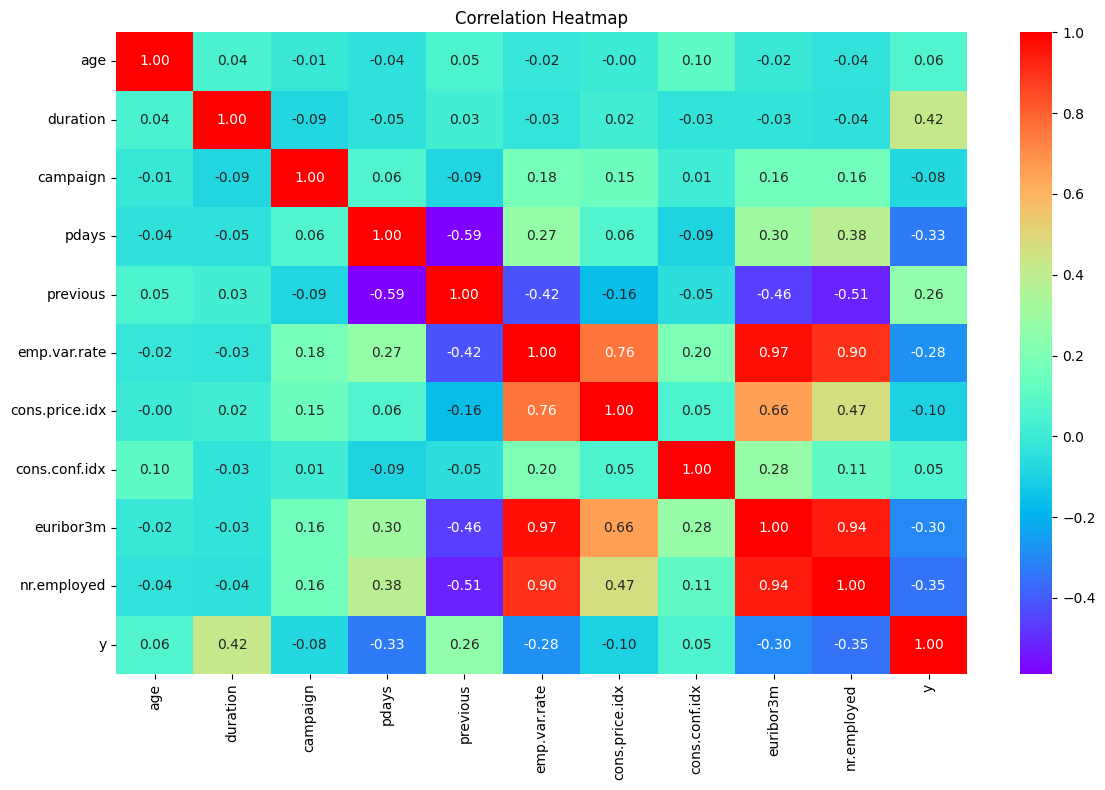

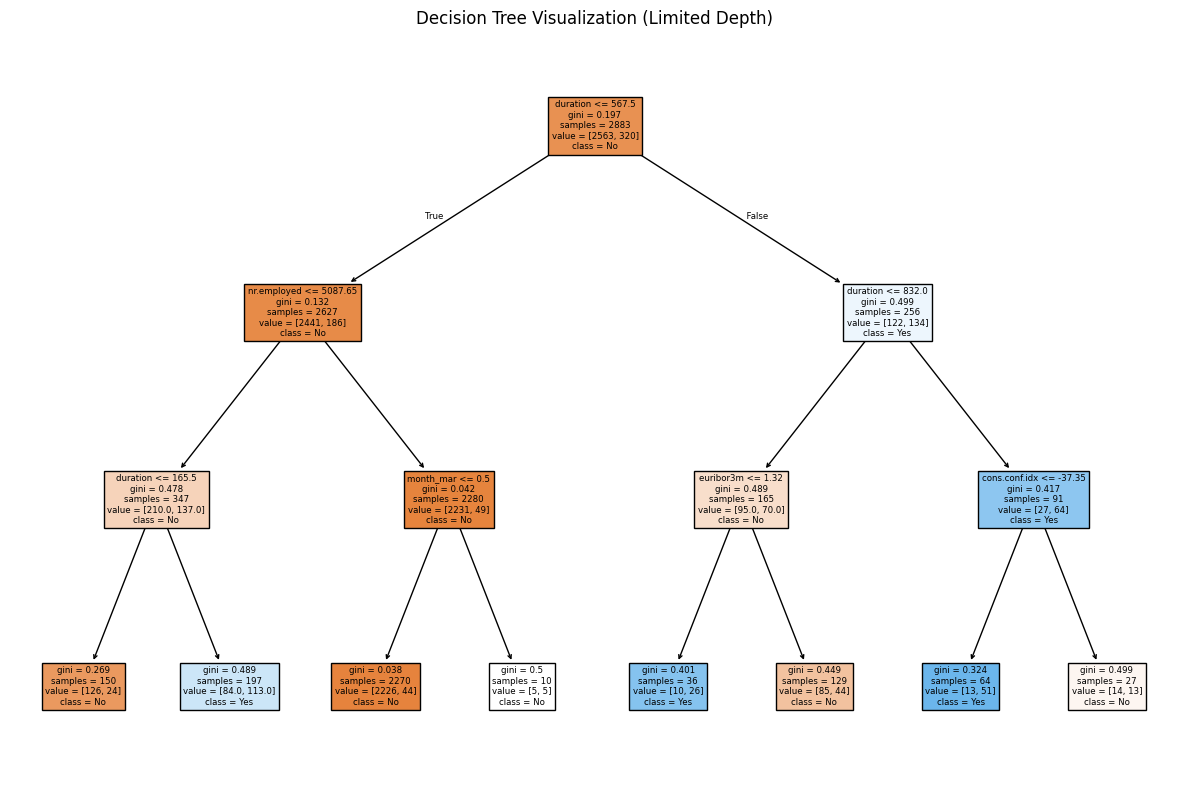

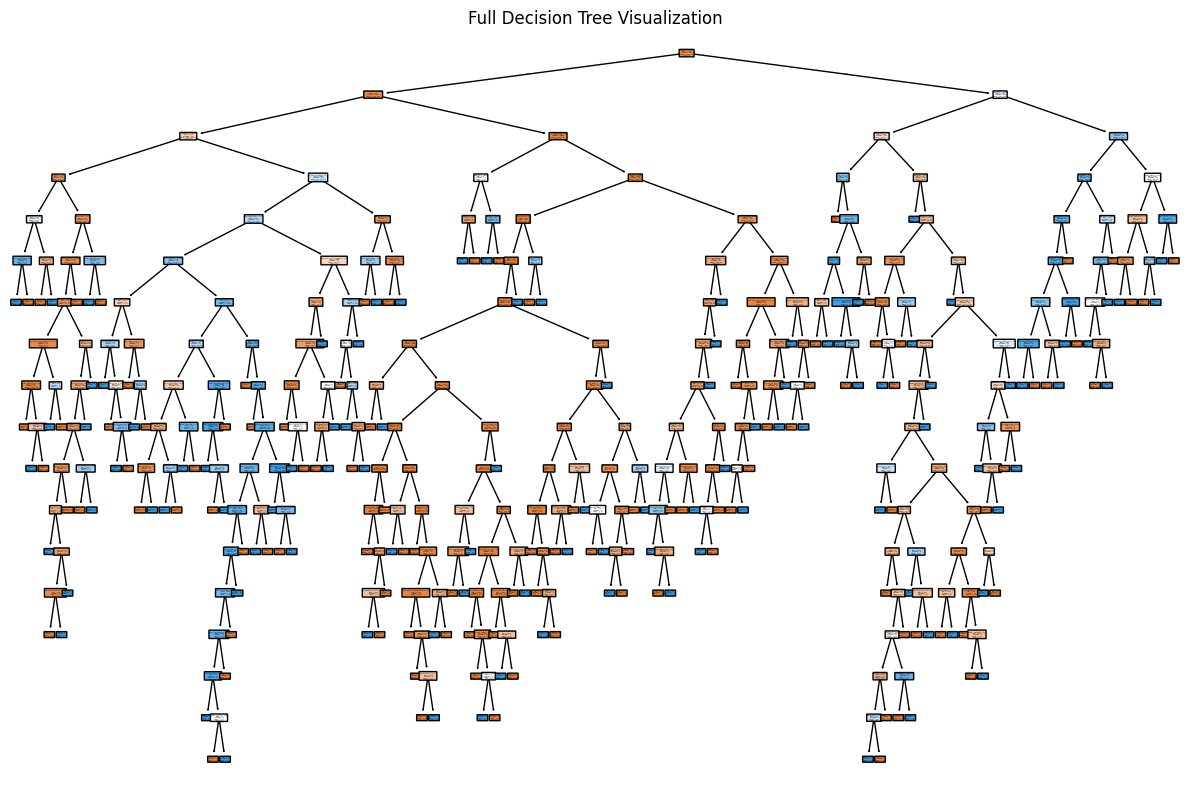

Accuracy: 0.8794498381877023

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1105
           1       0.44      0.55      0.49       131

    accuracy                           0.88      1236
   macro avg       0.69      0.73      0.71      1236
weighted avg       0.89      0.88      0.88      1236


Confusion Matrix:
 [[1015   90]
 [  59   72]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_16348\2611862744.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='Blues_d')


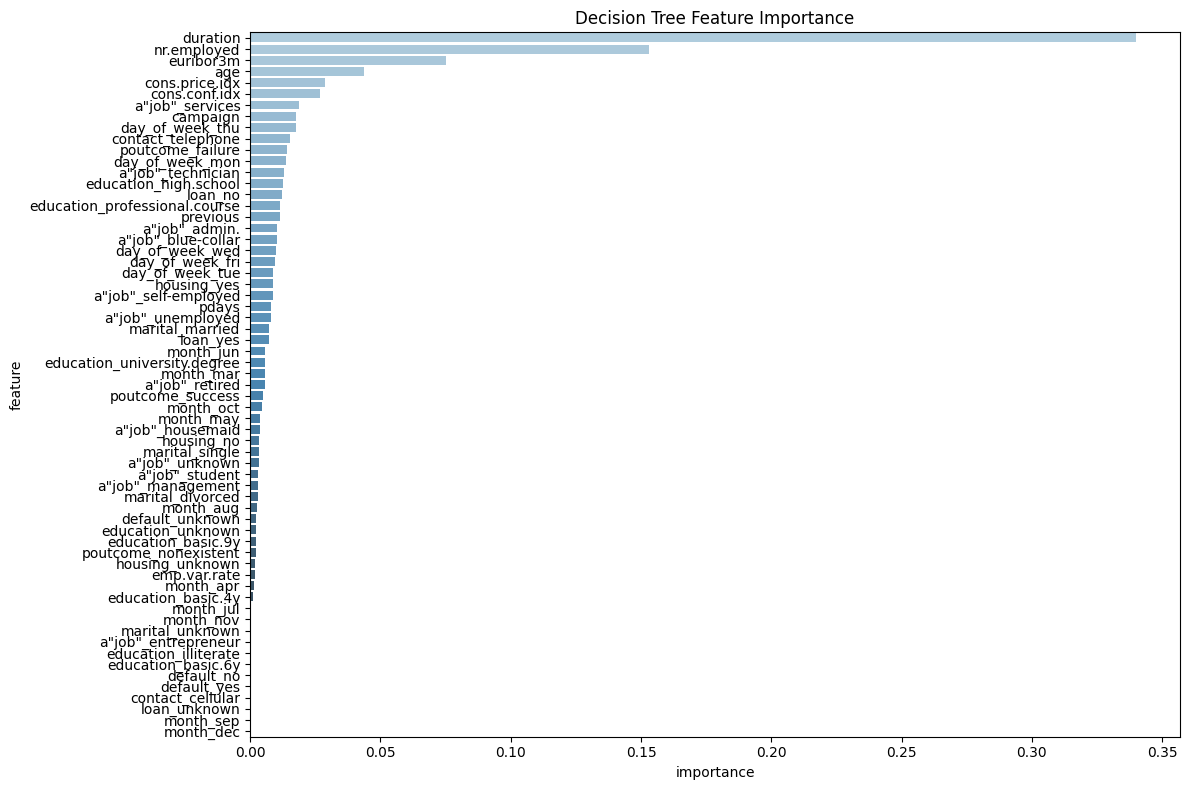

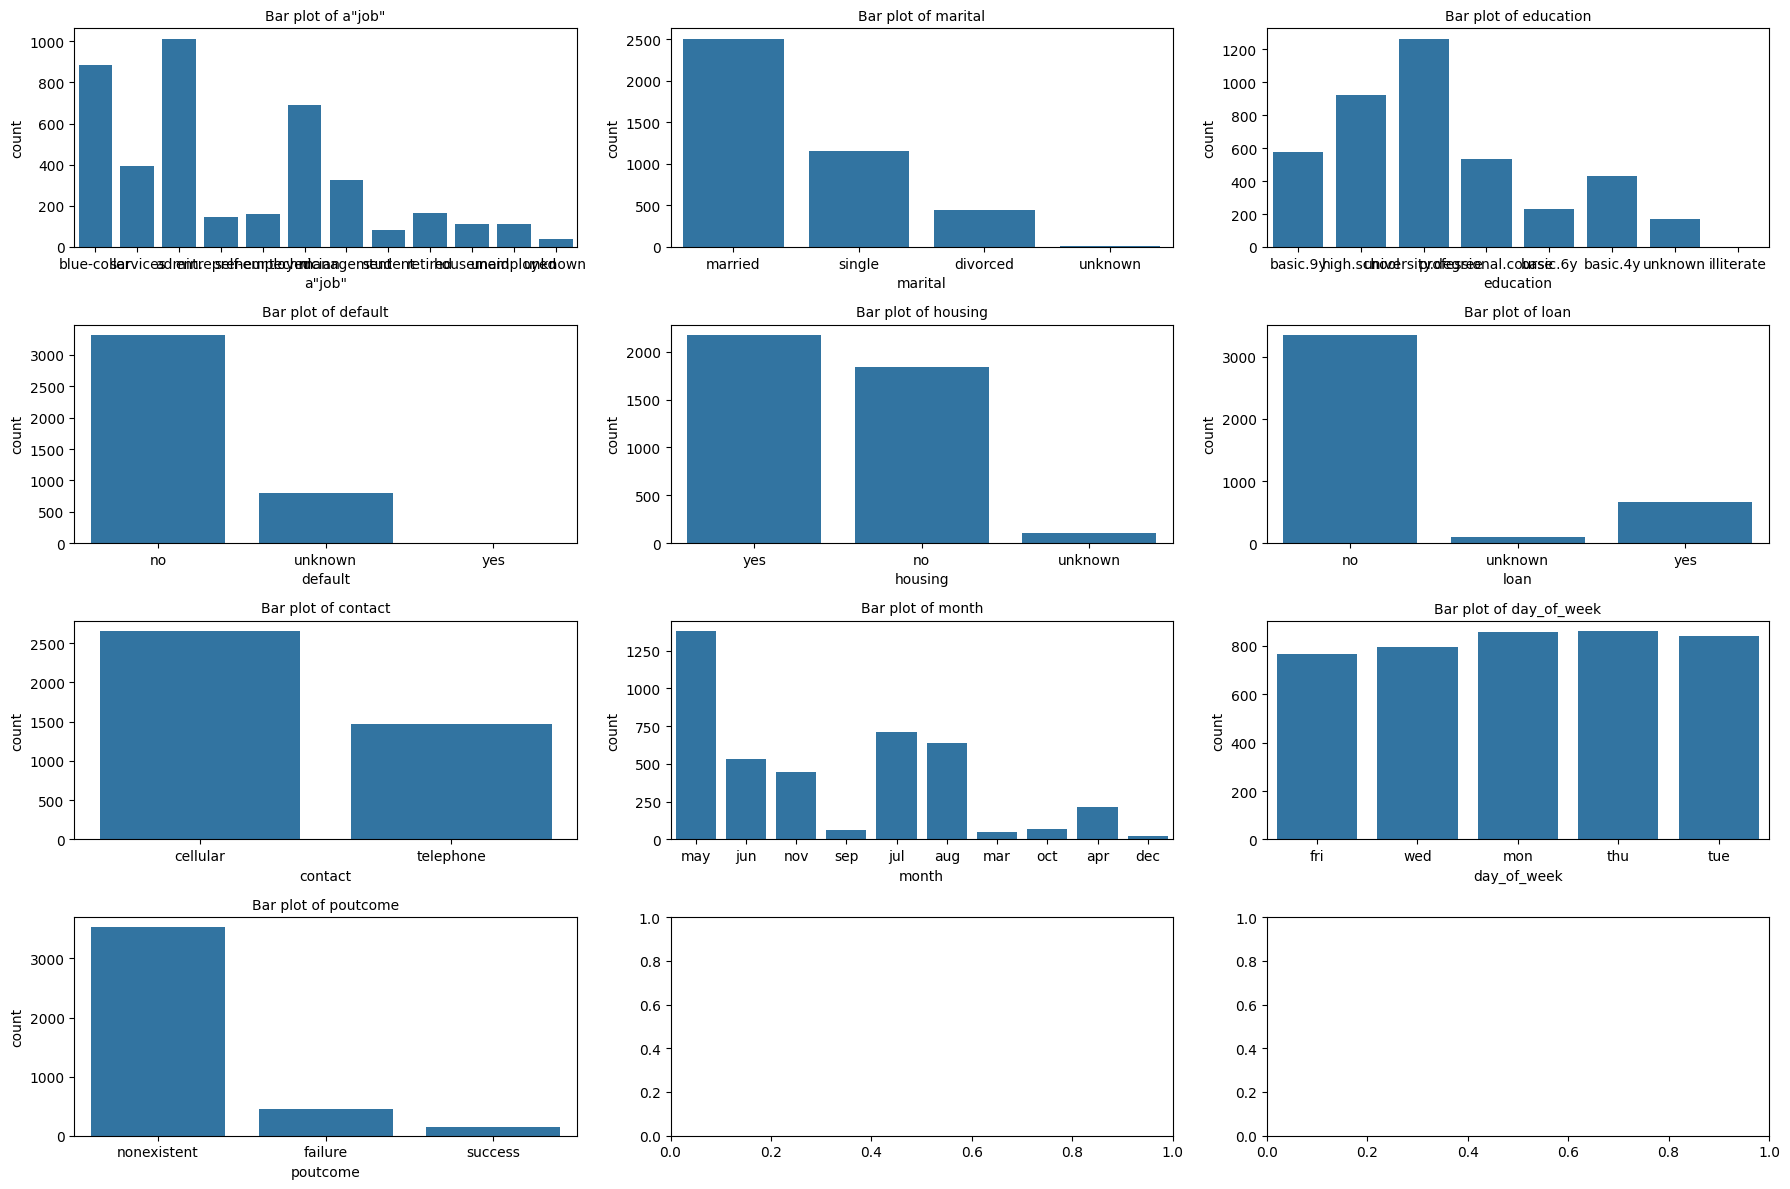

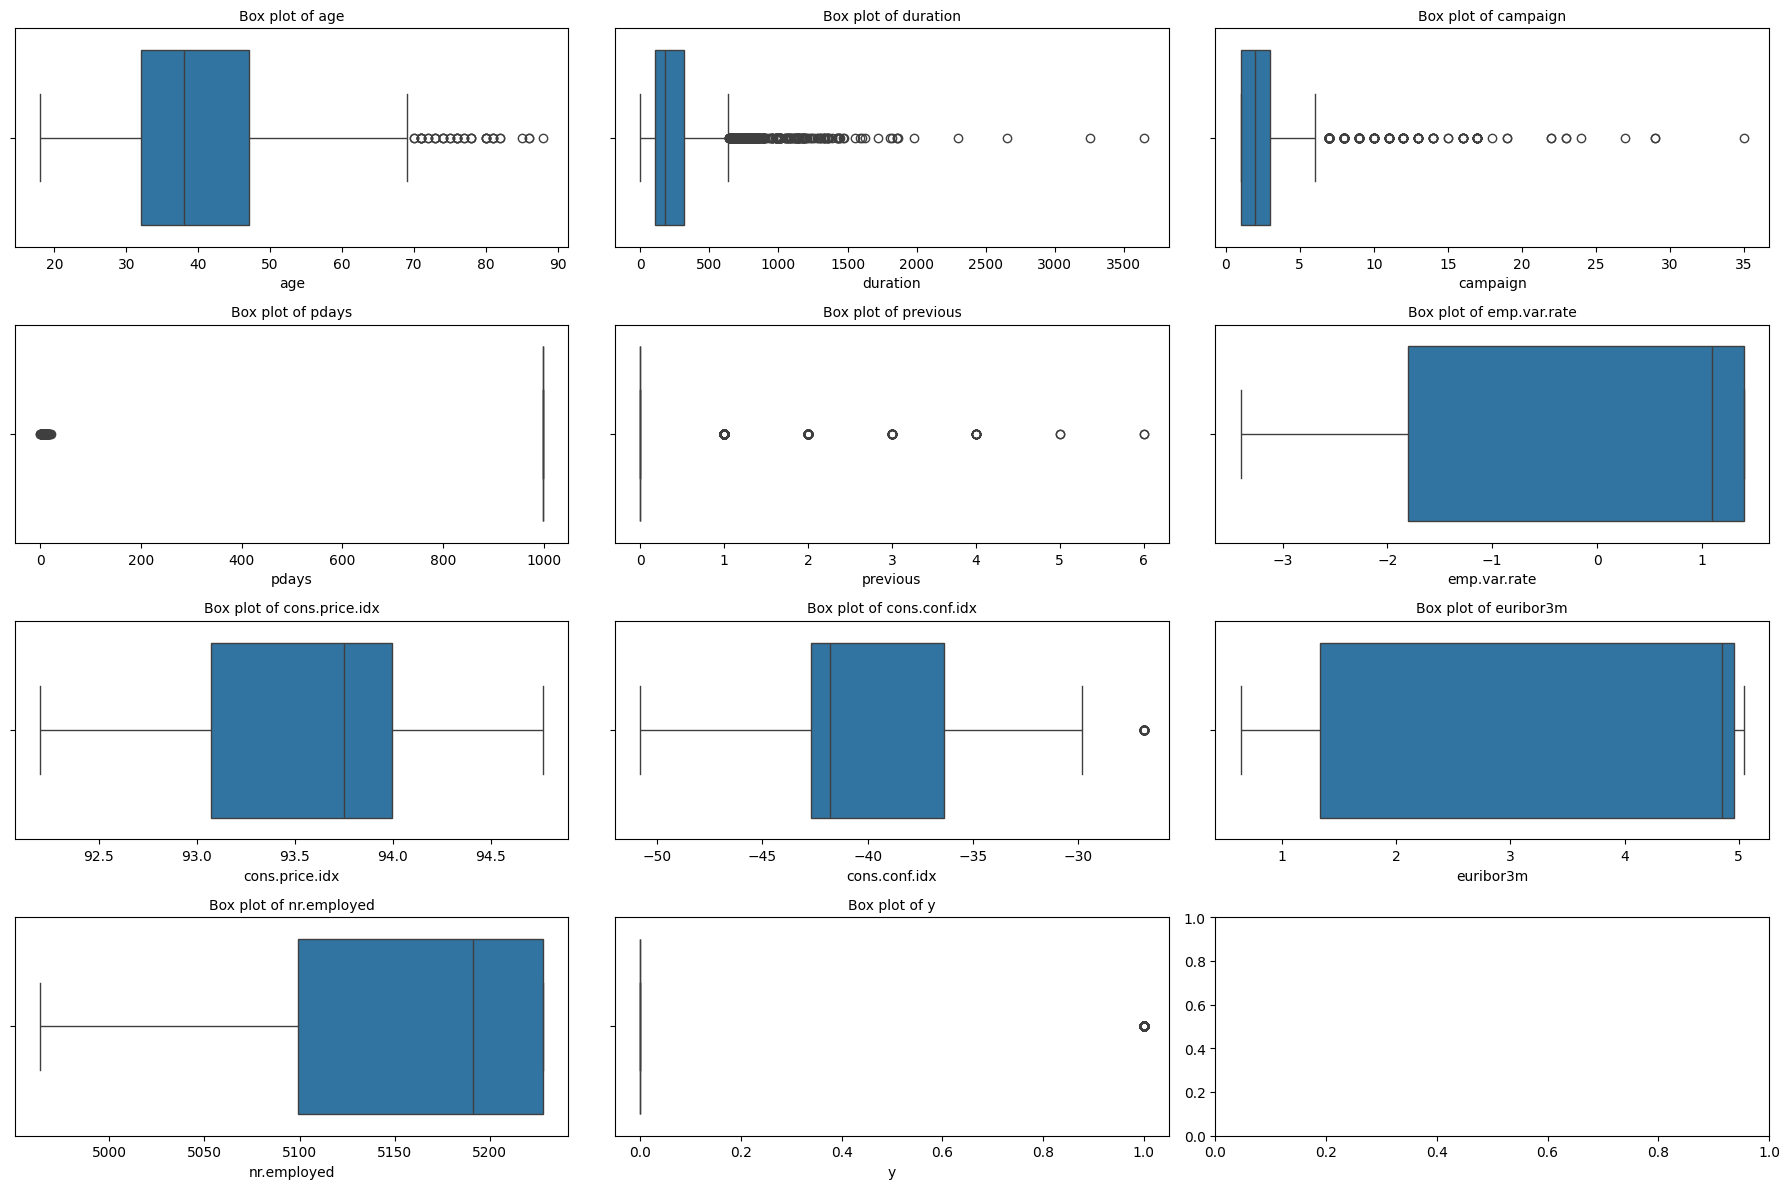

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Load the dataset from CSV
df = pd.read_csv('D:/bank-additional.csv')  # Replace 'bank-additional.csv' with your file path if needed

# Inspect the first few rows to understand the structure of your data
print(df.head())

# Print the column names to identify the target column
print("Columns in dataset:", df.columns)

# Assuming the target column is 'y' (replace this with the correct column name)
df['y'] = df['y'].map({'yes': 1, 'no': 0})  # Replace 'y' with your actual target column if different

# Drop rows with missing values if necessary
df.dropna(inplace=True)

# Split data into features (X) and target (y)
X = df.drop(columns=['y'])  # Features are all columns except the target
y = df['y']  # Target column

# Convert categorical variables to dummy/indicator variables (one-hot encoding)
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(df_numeric.corr(), annot=True, cmap='rainbow', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Decision Tree Visualization (Limited Depth)
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_limited.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_limited, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization (Limited Depth)')
plt.tight_layout()
plt.show()

# Decision Tree Visualization (Full Depth)
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_full, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Full Decision Tree Visualization')
plt.tight_layout()
plt.show()

# Predictions and Evaluation
y_pred = clf_full.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Feature Importance
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': clf_full.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='Blues_d')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

# Bar plots for Categorical Features
categorical_columns = df.select_dtypes(include=['object']).columns
num_cols = 3
num_rows = len(categorical_columns) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
for i, feature in enumerate(categorical_columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(x=feature, data=df, ax=ax)
    ax.set_title(f'Bar plot of {feature}', fontsize=10)
plt.tight_layout()
plt.show()

# Box plots for Numerical Features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = 3
num_rows = len(numerical_columns) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
for i, feature in enumerate(numerical_columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(x=feature, data=df, ax=ax)
    ax.set_title(f'Box plot of {feature}', fontsize=10)
plt.tight_layout()
plt.show()